## Things to explore

- Estimate front/backyard space
- Waterfront views
- Determine density based on nearest 15 neighbors columns
- 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [10]:
kc_house_df = pd.read_csv('kc_house_data.csv')

In [11]:
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
kc_house_df['waterfront'].fillna(0, inplace=True)

In [14]:
kc_house_df['yr_renovated'].fillna(0, inplace=True)
kc_house_df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
def is_renovated(reno_list):
    new_list = []
    for x in reno_list:
        if x == 0:
            new_list.append(False)
        else:
            new_list.append(True)
    return new_list

In [16]:
kc_house_df['is_renovated'] = is_renovated(kc_house_df['yr_renovated'])

In [17]:
kc_house_df['view'].fillna(0, inplace=True)

In [18]:
def become_date(date_list):
    new_list=[]
    for x in date_list:
        new_list.append(datetime.strptime(x, '%m/%d/%Y'))
    return new_list

In [19]:
kc_house_df['date'] = become_date(kc_house_df['date'])
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,False


In [20]:
def trans_int(string_list):
    new_list = []
    for x in string_list:
        if x == '?':
            new_list.append(x)
        else:
            new_list.append(int(float(x)))
    return new_list

In [21]:
kc_house_df['sqft_basement'] = trans_int(kc_house_df['sqft_basement'])
kc_house_df['yr_renovated']  = trans_int(kc_house_df['yr_renovated'])
kc_house_df['waterfront']    = trans_int(kc_house_df['waterfront'])
kc_house_df['view']          = trans_int(kc_house_df['view'])
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,True
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,False


In [22]:
kc_house_df['sqft_basement'] =  kc_house_df['sqft_living'] -  kc_house_df['sqft_above']

In [23]:
def has_basement(basement_list):
    new_list = []
    for x in basement_list:
        if x == 0:
            new_list.append(False)
        else:
            new_list.append(True)
    return new_list

In [24]:
kc_house_df['has_basement'] = has_basement(kc_house_df['sqft_basement'])

In [25]:
kc_house_df_new = kc_house_df

In [27]:
kc_house_df_new.to_csv('kc_house_df_new.csv', index=False)

In [30]:
kc_house_df_new.corr().price
kc_house_df_new.head(15)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,has_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,False,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,True,True
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,False,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,False,True
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,False,False
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,False,True
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,False,False
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,False,False
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,False,True
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,False,False


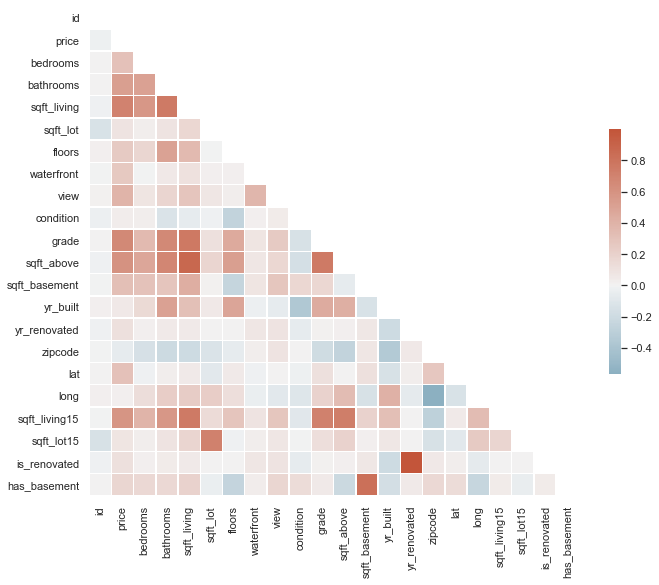

In [20]:
sns.set_theme(style="white")

corr  = kc_house_df_new.corr()
mask  = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap  = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [21]:
kc_house_price_corr = kc_house_df_new.corr()['price'].map(abs).sort_values(ascending=False)
kc_house_price_corr

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
has_basement     0.180082
yr_renovated     0.117855
is_renovated     0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

In [22]:
kc_house_df_new['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

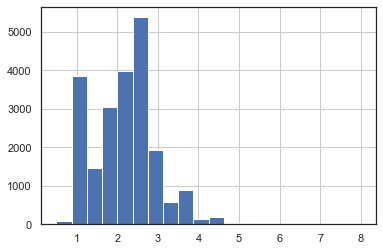

In [23]:
kc_house_df_new.bathrooms.hist(bins=20);

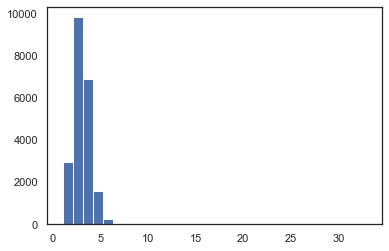

In [24]:
fig, ax = plt.subplots()

ax.hist(kc_house_df_new['bedrooms'], bins=30);

In [25]:
kc_house_df_new['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
kc_house_df[kc_house_df_new['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,has_basement
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,False,True


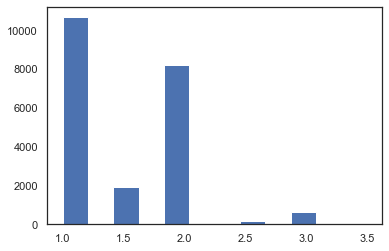

In [27]:
fig, ax = plt.subplots()

ax.hist(kc_house_df_new['floors'], bins=12);

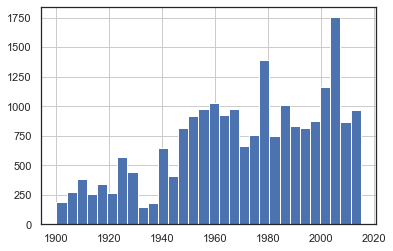

In [28]:
kc_house_df_new['yr_built'].hist(bins=30);

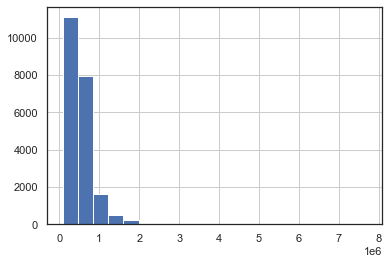

In [29]:
kc_house_df_new.price.hist(bins=20);

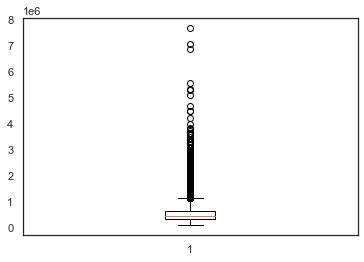

In [30]:
fig, ax = plt.subplots()

ax.boxplot(kc_house_df_new.price, showfliers=True);

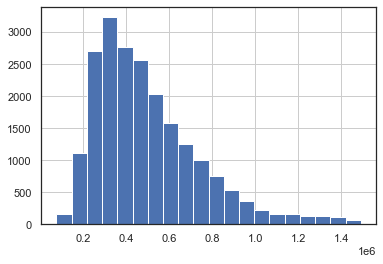

In [31]:
kc_house_df_new[kc_house_df_new['price'] < 1500000].price.hist(bins=20);

In [32]:
kc_no_outliers_df = kc_house_df_new[kc_house_df_new['price'] < 1000000]

In [33]:
kc_no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20107 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20107 non-null  int64         
 1   date           20107 non-null  datetime64[ns]
 2   price          20107 non-null  float64       
 3   bedrooms       20107 non-null  int64         
 4   bathrooms      20107 non-null  float64       
 5   sqft_living    20107 non-null  int64         
 6   sqft_lot       20107 non-null  int64         
 7   floors         20107 non-null  float64       
 8   waterfront     20107 non-null  int64         
 9   view           20107 non-null  int64         
 10  condition      20107 non-null  int64         
 11  grade          20107 non-null  int64         
 12  sqft_above     20107 non-null  int64         
 13  sqft_basement  20107 non-null  int64         
 14  yr_built       20107 non-null  int64         
 15  yr_renovated   2010

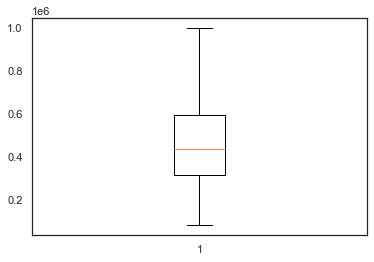

In [34]:
fig, ax = plt.subplots()

ax.boxplot(kc_no_outliers_df.price, showfliers=True);

In [35]:
bed_dummies        = pd.get_dummies(kc_no_outliers_df['bedrooms'], prefix='bed', drop_first=True)
bathroom_dummies   = pd.get_dummies(kc_no_outliers_df['bathrooms'], prefix='bath', drop_first=True)
waterfront_dummies = pd.get_dummies(kc_no_outliers_df['waterfront'], prefix='water', drop_first=True)
view_dummies       = pd.get_dummies(kc_no_outliers_df['view'], prefix='view', drop_first=True)
condition_dummies  = pd.get_dummies(kc_no_outliers_df['condition'], prefix='cond', drop_first=True)
grade_dummies      = pd.get_dummies(kc_no_outliers_df['grade'], prefix='grade', drop_first=True)
renovated_dummies  = pd.get_dummies(kc_no_outliers_df['is_renovated'], prefix='reno', drop_first=True)
basement_dummies   = pd.get_dummies(kc_no_outliers_df['has_basement'], prefix='bsmt', drop_first=True)

In [36]:
dummy_data = pd.concat([bed_dummies, bathroom_dummies, waterfront_dummies, view_dummies, condition_dummies, grade_dummies, renovated_dummies, basement_dummies], axis=1)
dummy_data

,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,reno_True,bsmt_True
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21593,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21594,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21595,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20107 entries, 0 to 21596
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bed_2      20107 non-null  uint8
 1   bed_3      20107 non-null  uint8
 2   bed_4      20107 non-null  uint8
 3   bed_5      20107 non-null  uint8
 4   bed_6      20107 non-null  uint8
 5   bed_7      20107 non-null  uint8
 6   bed_8      20107 non-null  uint8
 7   bed_9      20107 non-null  uint8
 8   bed_10     20107 non-null  uint8
 9   bed_11     20107 non-null  uint8
 10  bed_33     20107 non-null  uint8
 11  bath_0.75  20107 non-null  uint8
 12  bath_1.0   20107 non-null  uint8
 13  bath_1.25  20107 non-null  uint8
 14  bath_1.5   20107 non-null  uint8
 15  bath_1.75  20107 non-null  uint8
 16  bath_2.0   20107 non-null  uint8
 17  bath_2.25  20107 non-null  uint8
 18  bath_2.5   20107 non-null  uint8
 19  bath_2.75  20107 non-null  uint8
 20  bath_3.0   20107 non-null  uint8
 21  bath_3.25  2

In [38]:
kc_house_df_new[['lat', 'long']].agg(['min', 'max'])

,lat,long
min,47.1559,-122.519
max,47.7776,-121.315


In [2]:
kc_house_df_new['id'].unique.sum()

NameError: name 'kc_house_df_new' is not defined